<center>
    <h2>Hệ thống dự đoán khách hàng rời bỏ</h2>
</center>

<hr>

<div style="text-align: center;">
    <img src="data/Customer-Churn.jpg" width="600px">
</div>


# I. Mô tả tập dữ liệu và bài toán

## 1.1 Mô tả tập dữ liệu

Tập dữ liệu lưu trữ thông tin về khách hàng của một công ty cung cấp các dịch vụ viễn thông. Tập dữ liệu bao gồm 7043 bản ghi, tương ứng 7043 khách hàng, mỗi khách hàng có 21 thuộc tính chia thành 3 nhóm sau:

**A. Thông tin chung của khách hàng:**

 1. customerID: Mã khách hàng
 2. gender: Giới tính khách hàng ( male | female )
 3. SeniorCitizen: Giới hạn tuổi (0:trẻ - 1:già)
 4. Partner: Khách hàng có là đối tác hay không ( Yes:có - No:không)
 5. Dependents: Khách hàng có người phụ thuộc không ( Yes:có - No:không)
 6. tenure: Số tháng khách hàng gắn bó với công ty

**B. Thông tin các dịch vụ khách hàng đăng kí sử dụng:**

 7. PhoneService: Khách hàng có sử dụng dịch vụ điện thoại hay không ( Yes|No )
 8. MultipleLines: Khách hàng có sử dụng nhiều line điện thoại không (Yes/No/No phone service)
 9. InternetService: Dịch vụ Internet của khách hàng (DSl: cáp đồng/ Fiber optic: cáp quang/ No)
 10. OnlineSecurity: Khách hàng có sử dụng dịch vụ bảo mật online không (Yes/No/No Internet service)
 11. OnlineBackup: Khách hàng có sử dụng dịch vụ dự phòng online không (Yes/No/No internet service)
 12. DeviceProtection: Khách hàng có sử dụng dịch vụ bảo vệ thiết bị không (Yes/No/No internet service)
 13. Techsupport: Khách hàng có sử dụng dịch vụ kĩ thuật hỗ trợ không (Yes/No/No internet service)
 14. StreamingTV: Khách hàng có sử dụng dịch vụ truyền hình trực tuyến không (Yes/No/No internet service)
 15. StreamingMovies: Khách hàng có sử dụng dịch vụ xem phim trực tuyến không (Yes/No/No internet service)

 **C. Thông tin hợp đồng của khách hàng:**
 
 16. Contract: Thời hạn hợp đồng của khách hàng (Month-to-month | One year | Two year)
 17. Paperlessbilling: Khách hàng thanh toán có sử dụng giấy hay không (Yes|No)
 18. PamentMethod: Phương thức thanh toán của khách hàng (Electronic check | Mailed check | Bank transfer | Credit card)
 19. MonthlyCharges: Số tiền mà khách hàng phải trả hàng tháng
 20. TotalCharges: Tổng số tiền khách hàng phải trả
 21. Churn: Khách hàng có rời bỏ hay không ( Yes|No)

## 1.2. Mô tả bài toán

- Khái niệm về khách hàng rời bỏ: Khách hàng rời bỏ ( Customer Churn ) được định nghĩa là khách hàng hoặc người đăng kí ngừng kinh doanh với 1 công ty hoặc 1 dịch vụ nào đó.
- Khách hàng trong ngành viễn thông có thể lựa chọn từ nhiều nhà cung cấp dịch vụ khác nhau. Và khách hàng có thể dễ dàng chuyển đổi từ nhà cung cấp này sang nhà cung cấp khác.
- Trong thị trường cạnh tranh cao của ngành viễn thông tỷ lệ rời bỏ hàng năm từ 15-20%
- Tỷ lệ khách hàng rời bỏ là một thước đo quan trọng trong việc giữ chân 1 khách hàng hiện tại sẽ ít tốn kém hơn so với việc thu hút khách hàng mới.

## 1.3. Mục tiêu

- Phân tích dữ liệu để thấy được chân dung khách hàng đăng kí sử dụng dịch vụ của công ty
- Tập trung vào các khác hàng đã rời bỏ, xác định các yếu tố quan trọng ảnh hưởng tới việc rời bỏ của khách hàng.
- Đưa ra các khuyến nghị để công ty xem xét, cải thiện các yếu tố giúp giữ chân khách hàng
- Xây dựng một mô hình học máy (machine learning) để dự đoán khả năng một khách hàng có rời bỏ dịch vụ (churn) hay không, dựa trên các đặc điểm cá nhân, hành vi sử dụng dịch vụ, và thông tin thanh toán.

# II. Phân tích dữ liệu

### Thống kê dữ liệu 

In [160]:
#gọi các thư viện:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#------------------------------
import warnings
warnings.filterwarnings('ignore')

In [161]:
data = pd.read_csv('data/Churn_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [162]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

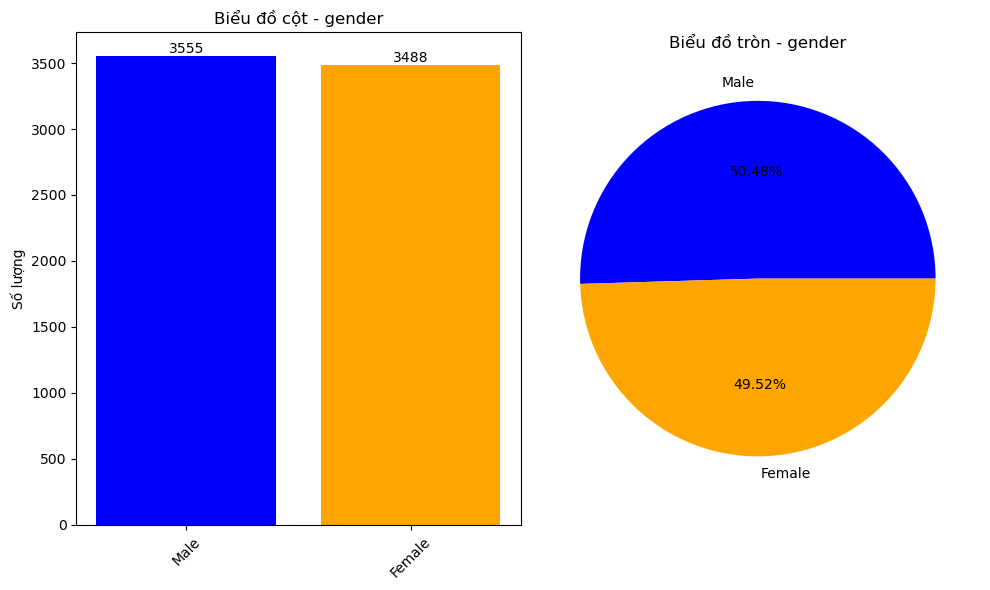

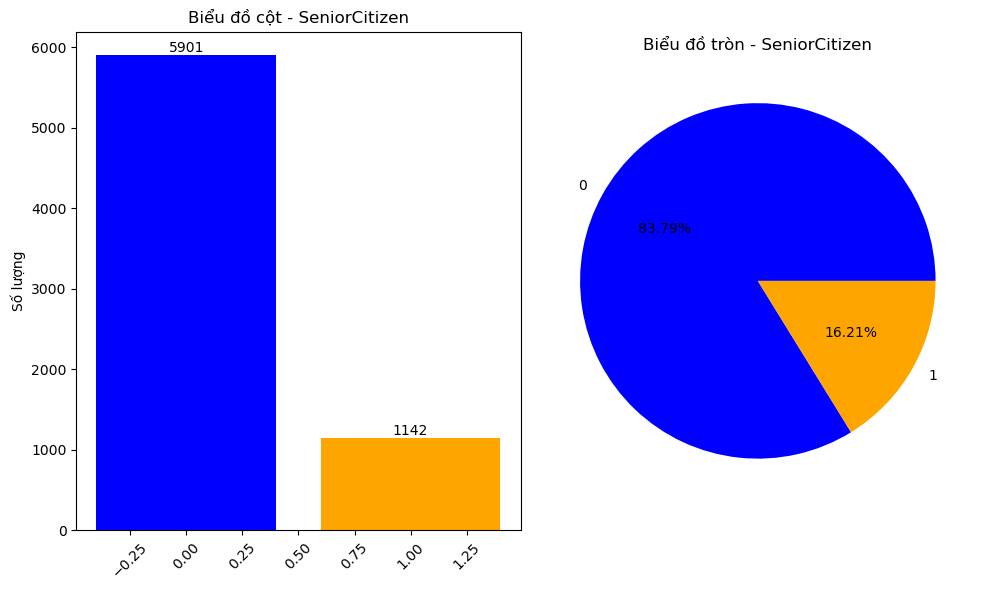

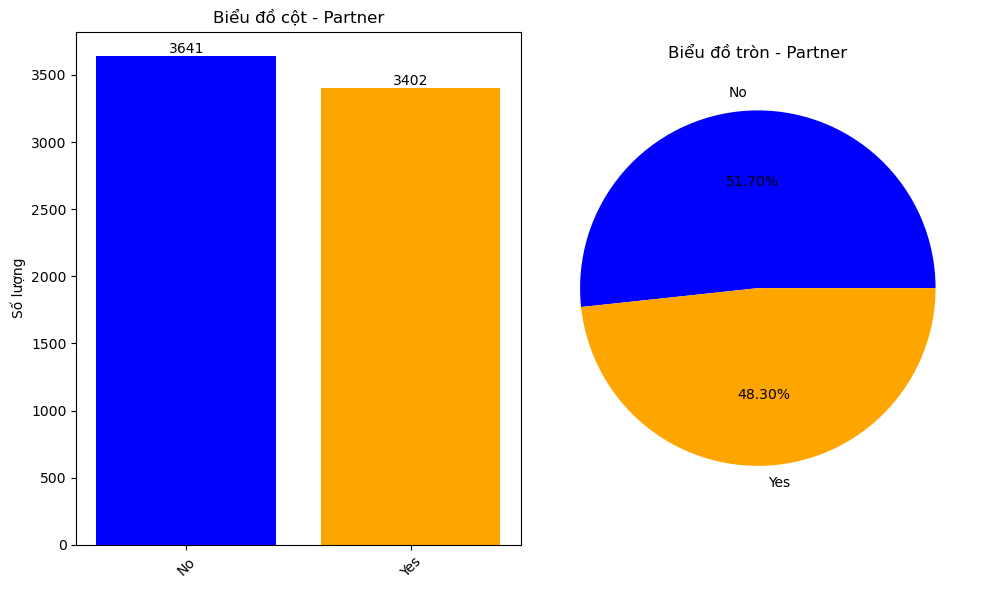

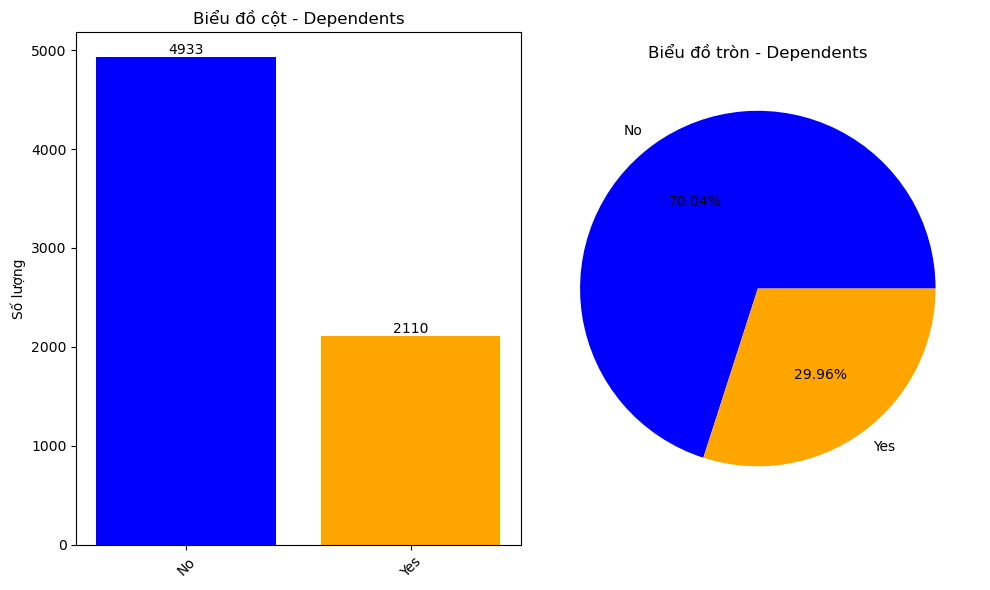

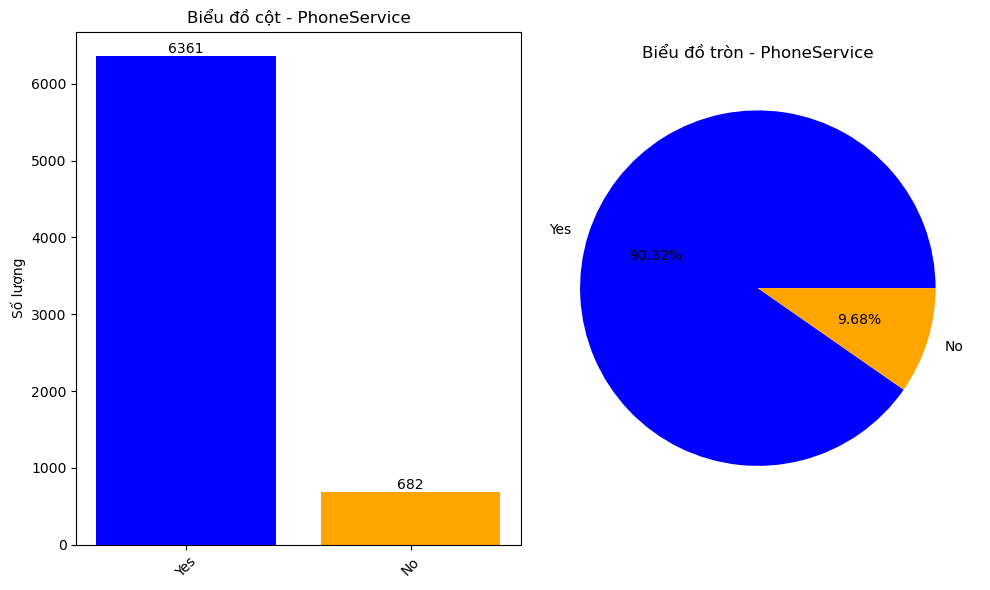

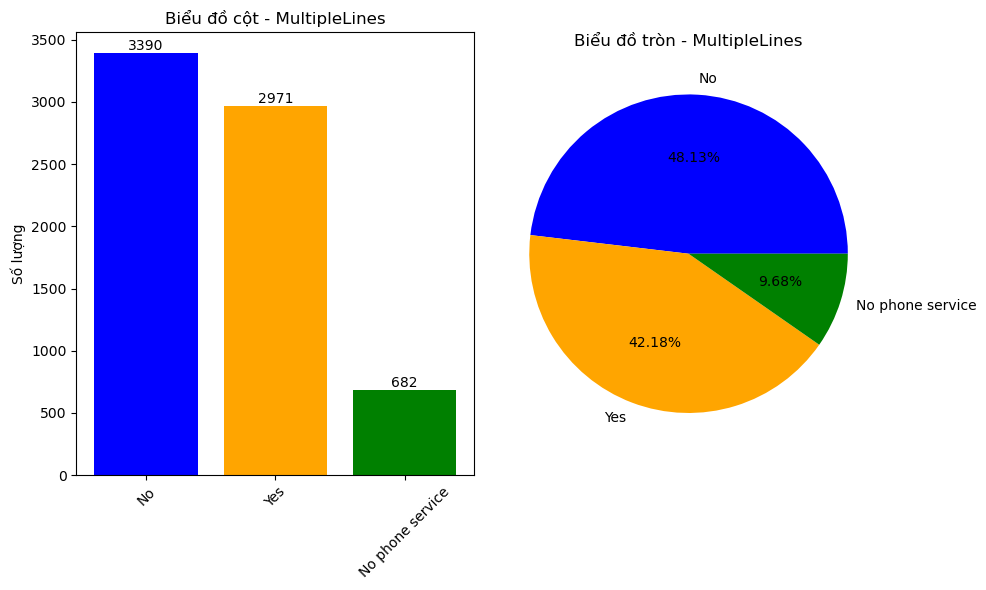

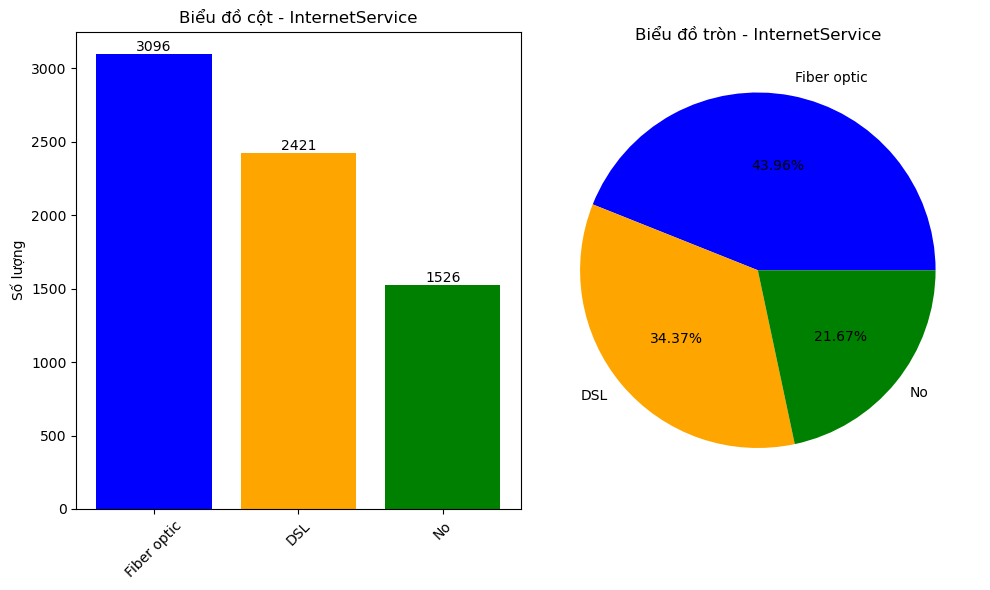

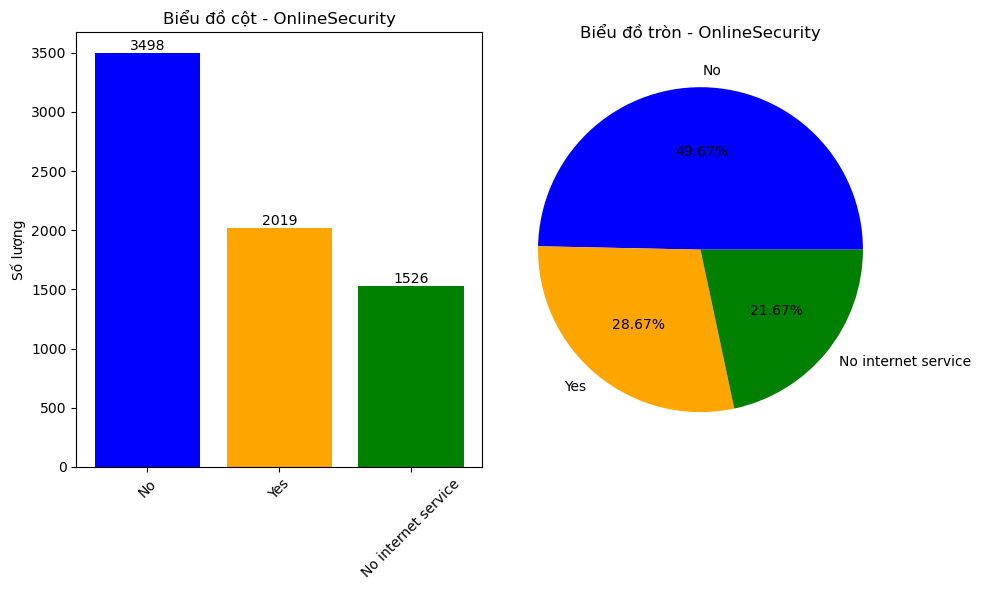

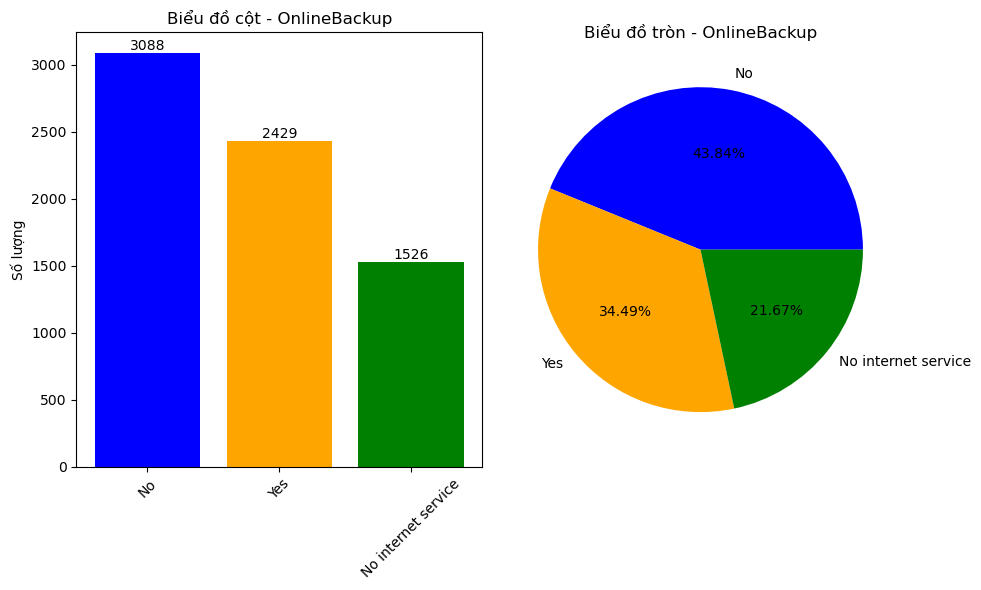

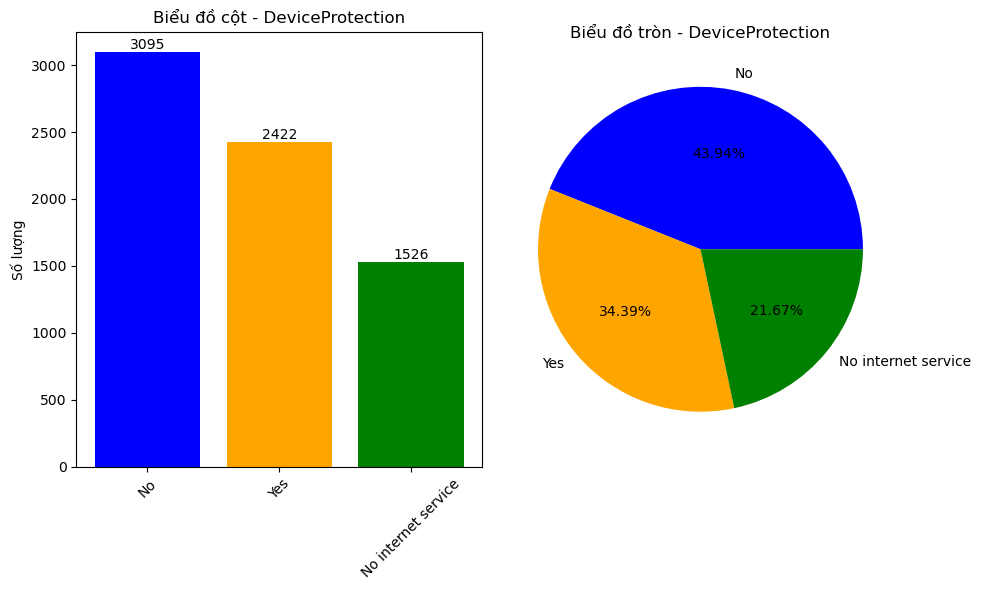

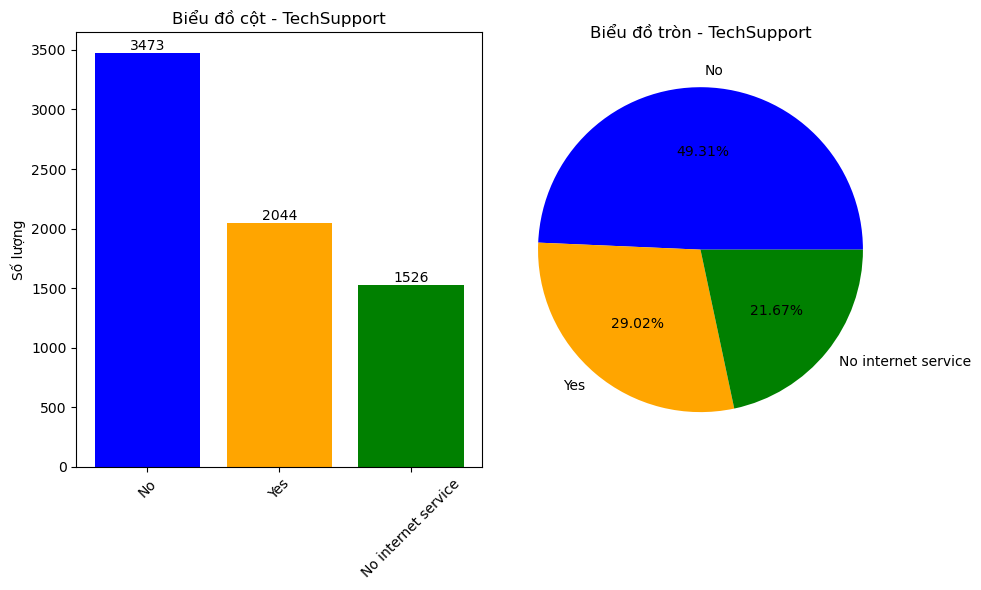

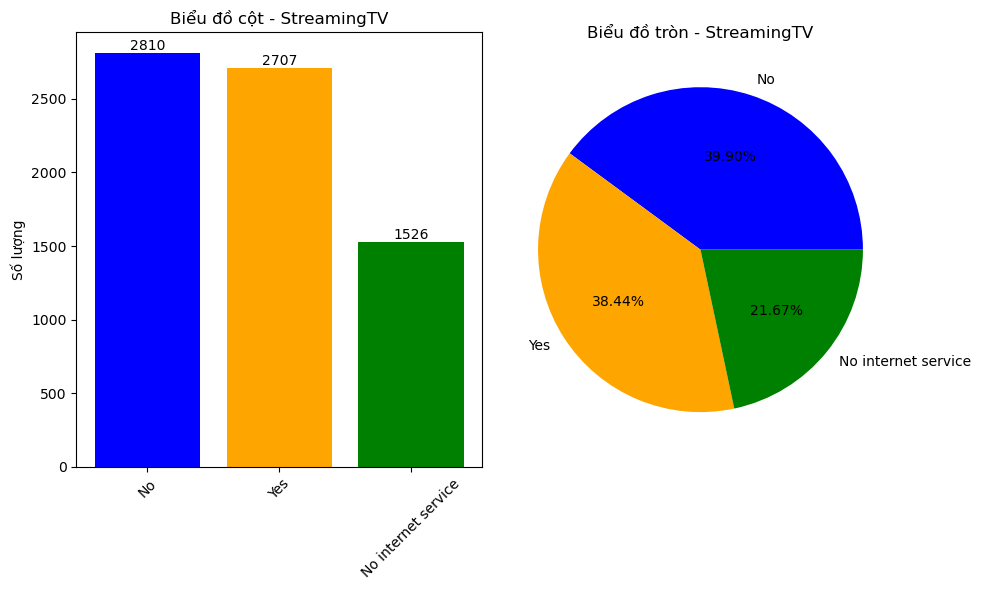

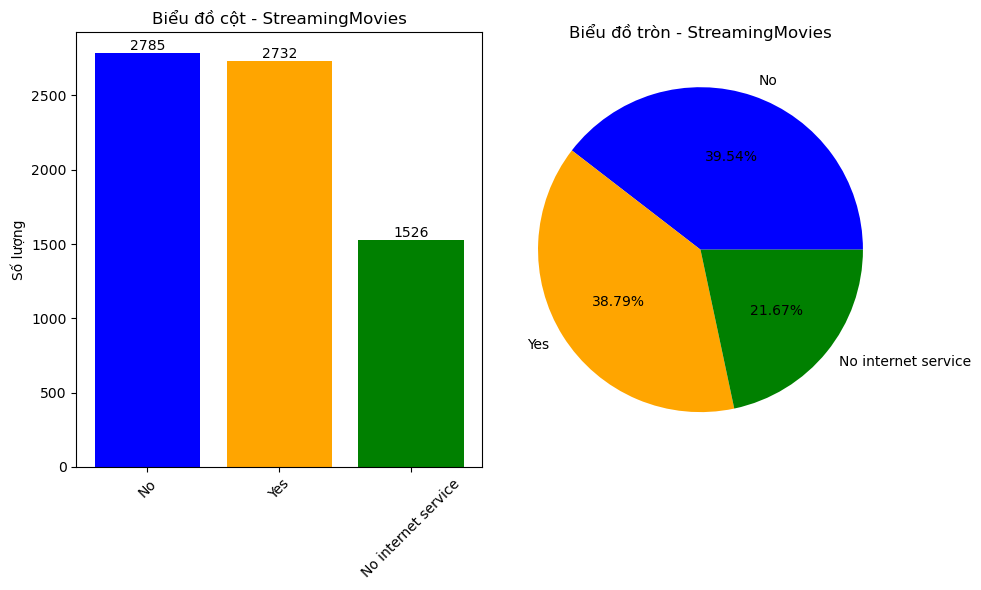

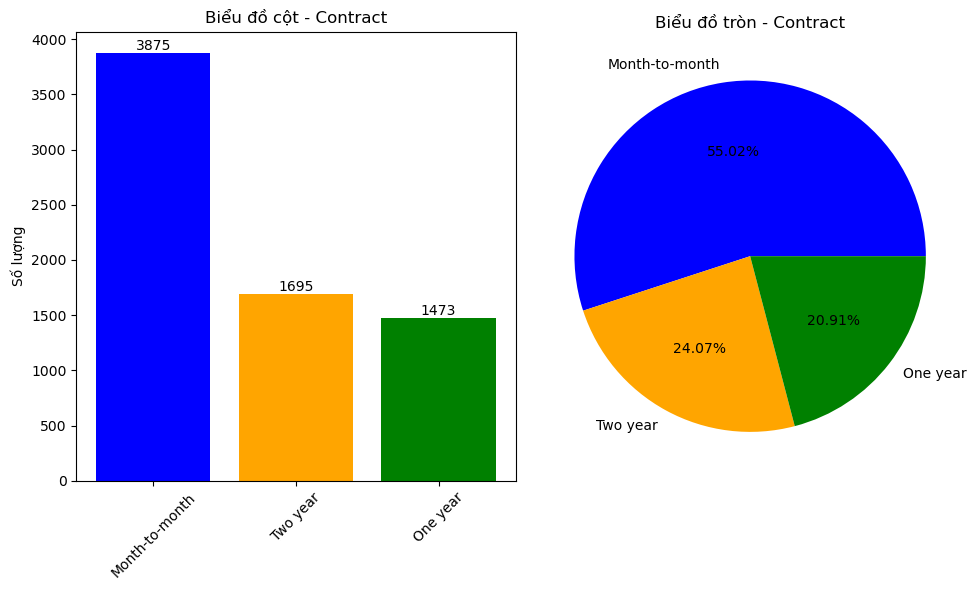

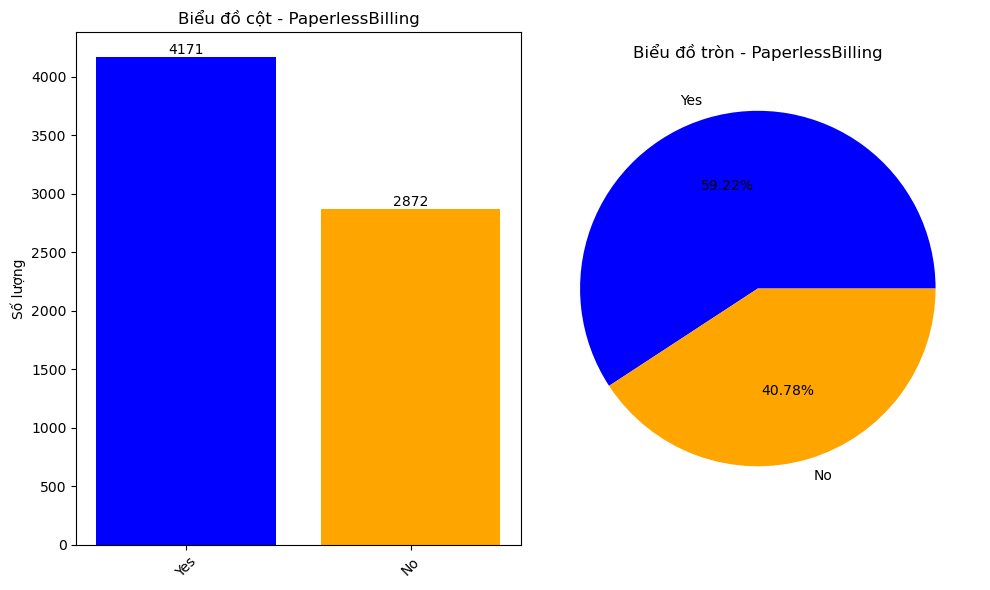

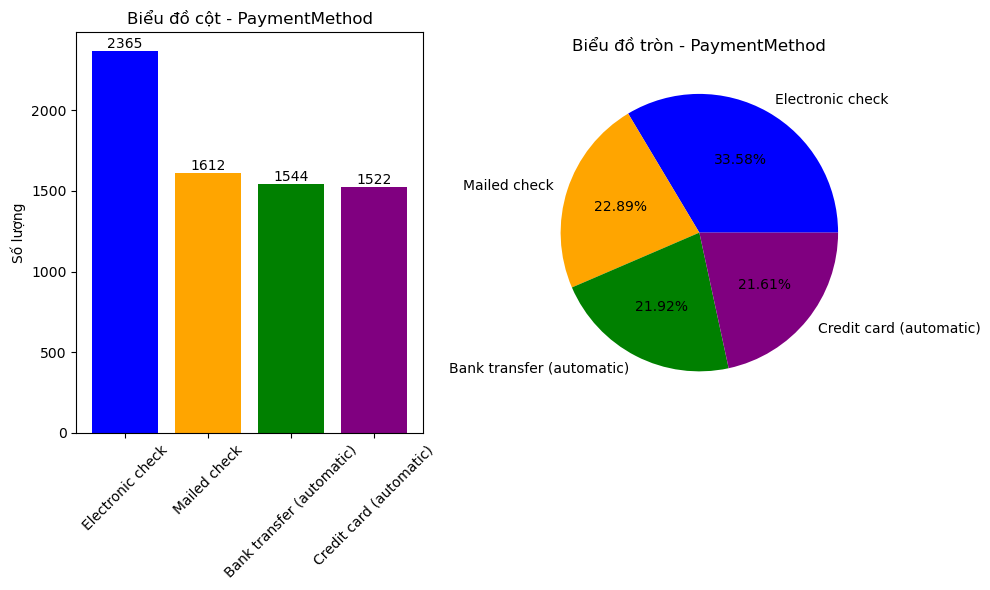

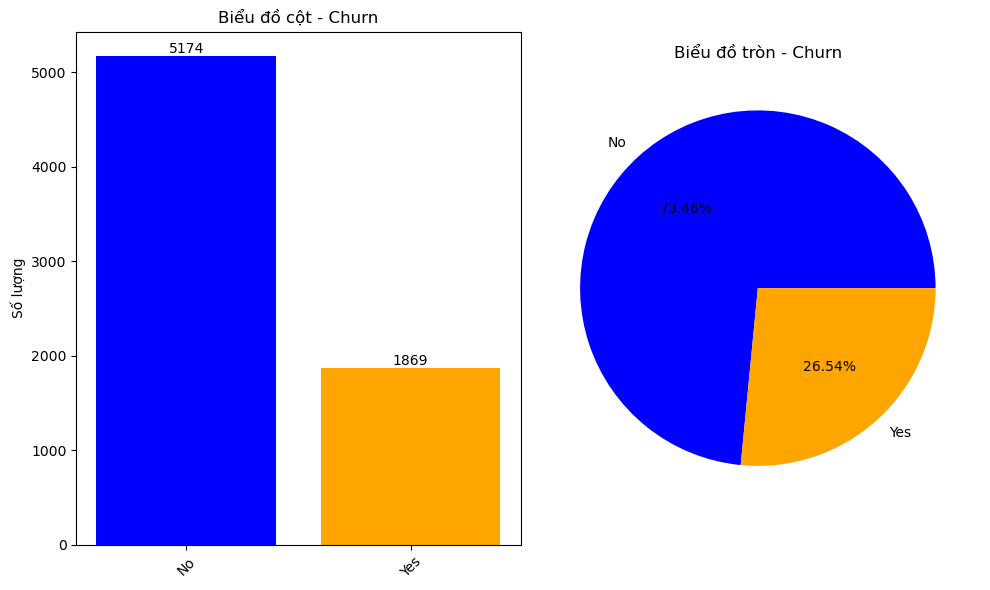

In [163]:
import matplotlib.pyplot as plt

def plot_statistics(data, columns):
    for col in columns:
        counts = data[col].value_counts()
        labels = counts.index
        
        # Tạo biểu đồ
        plt.figure(figsize=(10, 6))
        
        # Biểu đồ cột
        plt.subplot(1, 2, 1)
        bars = plt.bar(labels, counts.values, color=['blue', 'orange', 'green', 'purple', 'red'])
        plt.title(f"Biểu đồ cột - {col}")
        plt.ylabel("Số lượng")
        plt.xticks(rotation=45)
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=10)
        
        # Biểu đồ tròn
        plt.subplot(1, 2, 2)
        plt.pie(counts.values, labels=labels, autopct='%.2f%%', colors=['blue', 'orange', 'green', 'purple', 'red'])
        plt.title(f"Biểu đồ tròn - {col}")
        
        plt.tight_layout()
        plt.show()

# Gọi hàm với DataFrame và danh sách các cột
columns_to_plot = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

plot_statistics(data, columns_to_plot)


**Nhận xét:**

***Nhìn chung, trong 7043 khách hàng thì:***

1. Tỉ lệ giữa giới tính nam và nữ đều như nhau
2. Hơn 80% khách hàng đăng kí dịch vụ thuộc độ tuổi trẻ, chỉ có 16% khách hàng già.
3. Về thuộc tính Partner thì cũng 50:50, 50% khách hàng là đối tác của công ty, 50% thì không phải
4. Thuộc tính Dependent thì có mối tương quan với thuộc tính SeniorCitizen. Hơn 80% khách hàng trẻ thì cũng chiếm khoảng 70% khách hàng không phụ thuộc vì những người trẻ chưa lập gia đình, chưa có con cái cho nên tỉ lệ người phụ thuộc cũng có quan hệ với độ tuổi này.

***Tiếp theo là sang các loại hợp đồng và phương thức thanh toán***

5. Thì 55% khách hàng sử dụng dịch vụ là loại hình hợp đồng 1 tháng 1, còn tỉ lệ 1 năm và 2 năm thì cx khá tương đồng khoảng độ hơn 20%.
6. Về phương thức thanh toán thì phương thức Electronic check là cao nhất chiếm tới 33.63% tương ứng với 2365 khách hàng, còn các tỉ lệ khác thì tương đối cân bằng nhau khoảng hơn 20%

***Về phần dịch vụ, công ty cung cấp 2 dịch vụ đó là: dịch vụ điện thoại và dịch vụ Internet***

7. Trước tiên, về các khách hàng sử dụng điện thoaị (PhoneService), trong số 7043 khách hàng thì có 6361 người đăng kí dịch vụ điến thoại chiếm tỉ lệ 90%
8. Trong cái điện thoại thì lại đăng kí thành 1 đường line hay nhiều đường line ,thì tỉ lệ giữa 1 và nhiều đường line thì cũng same same như nhau khoảng hơn 40% cho mỗi loại

***Về đăng kí dịch vụ Internet***

9. Trong số 7043 khách hàng thì có 5517 khách hành sử dụng dịch vụ Internet, thì có tỉ lệ  những khách hàng dùng cap quang là cao nhất 44% sau đó là cap đồng là 34%
10. Còn các dịch vụ tương tự như thế, dịch vụ có đăng kí bảo mật online hay không, dịch vụ backup hay không, bảo vệ thiết bị hay không, rồi có sử dụng hỗ trợ hay không thì em cũng đã thống kê thông qua các biểu đồ đây.

***Có 2 dịch vụ mà người ta cũng đăng kí nhiều***

11. Dịch vụ StreamingTV và dịch vụ StreamingMovies thì trong số những người đăng kí dịch vuj Internet thì cx có 1 nửa đk TV và 1 nửa đk Movies.

***Đánh giá chung về tỉ lệ rời bỏ***

12. Tỉ lệ rời bỏ là 1 chỉ số rất quan trọng đối với doanh nghiệp, chỉ số này sẽ phản ánh chất lượng của sản phẩm cũng như dịch vụ trong mắt người tiêu dùng, và thái độ của người tiêu dùng đối với sản phẩm , dịch vụ mà doanh nghiệp cung cấp. Nếu tỉ lệ rời bỏ càng cao thì chứng tỏ dịch vụ của công ty càng có vấn đề.
13. Ở đây với công ty này, trong bộ dữ liệu hiện có 7043 khách hàng thì 1869 khách hàng rời bỏ ( chiếm 26.58% ). Như vậy ta thấy tỉ lệ  cao so với ngưỡng 15-20%, theo cái ngưỡng thông thường với các dịch vụ viễn thông. Tỉ lệ này tương đối là cảnh báo để chúng ta có thể đưa ra những cái chiến lược gì đó để giảm tỉ lệ xuống.


**Tổng kết lại:**

Chúng ta có:

1. 7043 khách hàng
2. 6361 khách hàng sử dụng PhoneService
3. 5517 khách hàng sử dụng InternetService
4. 4835 khách hàng sử dụng các dịch vụ về Phone&Internet
5. Có 1869 khách hàng rời bỏ

### Phân tích những yếu tố ảnh hưởng đến việc khách hàng rời bỏ

In [164]:
data_churn = data[data['Churn'] == 'Yes']

In [165]:
def plot_stacked_bar_with_values(data, columns, target_column='Churn', colors=['skyblue', 'orange']):
    # Xác định số lượng biểu đồ cần vẽ
    num_plots = len(columns)
    
    # Tạo subplot phù hợp với số lượng biểu đồ
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, num_plots * 4))

    # Đảm bảo axes là một mảng 1 chiều để có thể lặp qua dễ dàng
    axes = axes.flatten()

    # Lặp qua từng cột cần vẽ
    for i, col in enumerate(columns):
        # Nhóm dữ liệu theo cột phân loại và cột mục tiêu
        grouped_data = data.groupby([col, target_column]).size().unstack()

        # Vẽ biểu đồ
        bars = grouped_data.plot(kind='bar', stacked=True, color=colors, ax=axes[i])

        # Thêm số liệu trên các thanh
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                y = bar.get_y() + height / 2
                axes[i].text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

        # Tùy chỉnh biểu đồ
        axes[i].set_title(f'Biểu đồ xếp chồng: {col} và {target_column}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Số lượng khách hàng')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        axes[i].legend(title=target_column, labels=grouped_data.columns)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Điều chỉnh layout để không bị chồng lấn
    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()


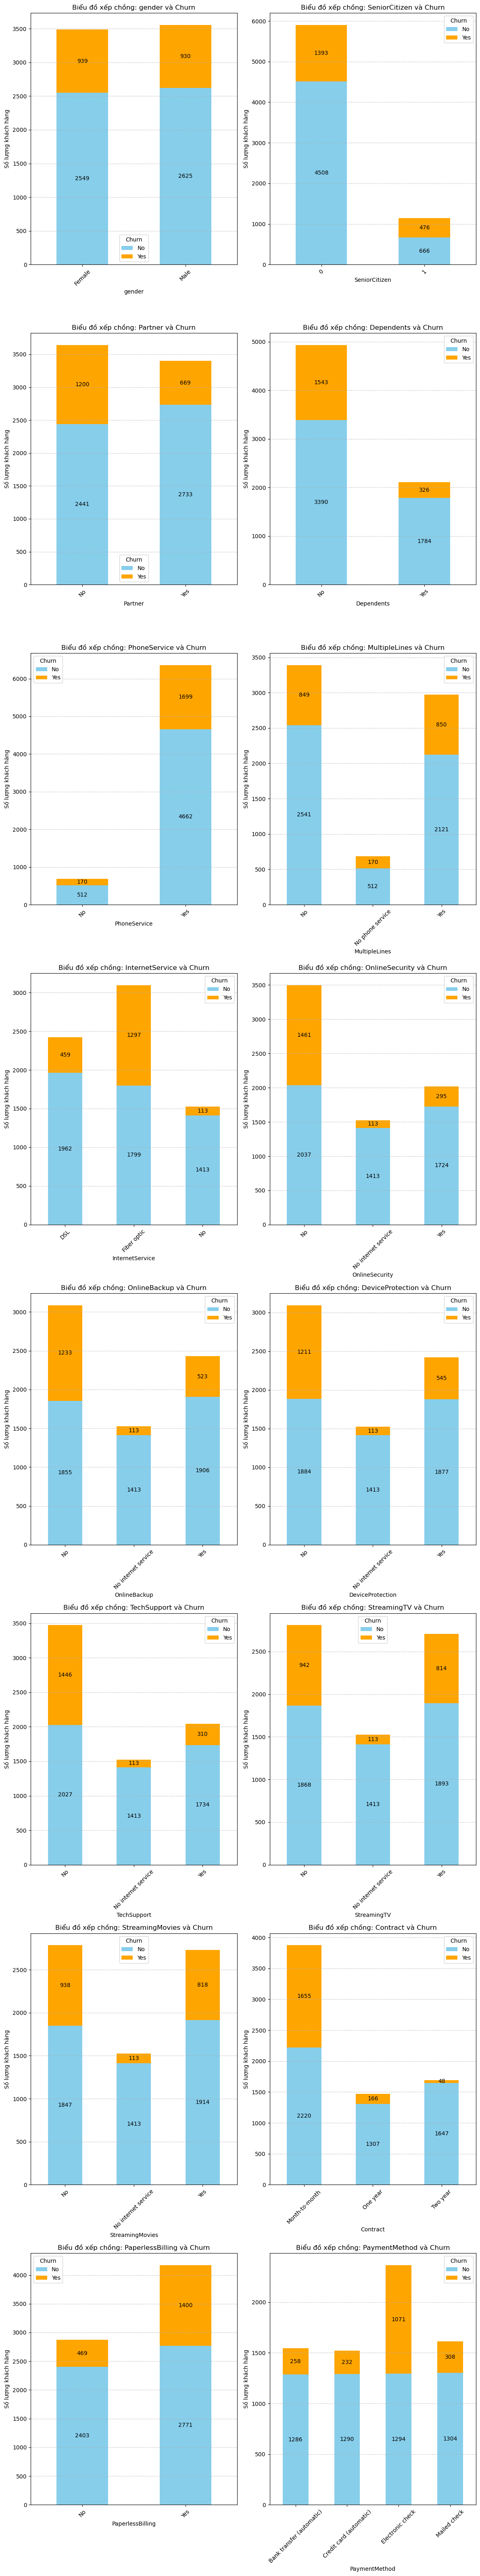

In [166]:
column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
           'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 
           'PaperlessBilling', 'PaymentMethod']

plot_stacked_bar_with_values(data, column)


**Nhận xét:**

1. Đánh giá tỉ lệ rời bỏ theo giới tính. Ở đây, giới tính có 3549 nam thì rời bỏ 930 chiếm 26.12%, giới tính nữ có 2458 thì rời bỏ 939 chiếm 27.15% ==> Như vậy, tỉ lệ rời bỏ của giới tính tương đối cân bằng nhau ==> giới tính không ảnh hưởng đến cái việc rời bỏ của khách hàng.
2. Đánh giá tỉ lệ rời bỏ theo độ tuổi. Ở đây đang có vấn đề, trong tổng số 5890 khách hàng trẻ thì có 1393 người rời bỏ chiếm 23.65%, 1142 khách hàng già thì có tới 476 người rời bỏ chiếm 41.68% tỉ lệ gấp 2 lần so với khách hàng trẻ ==> Độ tuổi có ảnh hưởng đến việc rời bỏ của khách hàng, những cái mình cấp cho người già đang có vấn đề gì mà khiến tỉ lệ người già bỏ đi cao như vậy.
3. Đánh giá tỉ lệ rời bỏ theo lượng khách hàng đăng kí sử dụng dịch vụ điện thoại. Thì đây là những chỉ số thống kê em đã thống kê được ==> Dịch vụ khá ổn , tỉ lệ không chênh nhau quá nhiều cho nên 2 thuộc tính PhoneService và MutipleLines không ảnh hưởng đến việc khách hàng rời bỏ.
4. Đánh giá tỉ lệ rời bỏ theo lượng khách hàng đăng kí sử dụng dịch vụ Internet. Thì ở đây có 1 vấn đề thấy ngay ở biểu đồ, Những người đăng kí cap quang có 3096 người thì có đến 1297 người rời bỏ chiếm tỉ lệ 41.89%, trong khi đó thì cap đồng chỉ chiếm 19% và không đăng kí chiếm 7.43%. Như vậy ta thấy dịch vụ cung cấp cáp quang của mình đang có vấn đề, tỉ lệ rời bỏ chiếm rất là lớn, gấp đôi gấp 3 lần so với các giá trị khác ==> thuộc tính InternetService có ảnh hưởng đến khách hảng rời bỏ.
5. Đánh giá tỉ lệ rời bỏ theo loại hợp đồng. Cũng tương tự như thế, tỉ lệ hợp đồng 1 tháng 1 chiếm tơi 42.71%, những cái còn lại thì thấp hơn rất nhiều. như vậy, có cái vấn đề về đó là những khách hàng có hợp đồng càng dài thì tỉ lệ rời bỏ càng thấp. Điều này cũng đúng thôi, bởi vì khi họ đã làm hợp đồng dài hạn thì chứng tỏ họ tin tưởng mình dẫn đến việc tỉ lệ rời bỏ thấp hơn. Còn những khách hàng 1 tháng 1 họ có thể là đăng kí thử, thăm dò, vậy nên những khách hàng này phải phục vụ tốt và có có chương trình ưu đã đặc gì đó để kích thích những người đăng kí 1 tháng 1 chuyển sang hợp đồng dài hơn.
==> Có ảnh hưởng đến việc khách hàng rời bỏ.
6. Đánh giá tỉ lệ rời bỏ theo hình thức thanh toán. ở đây đag có 4 loại hình thức thanh toán, trong đó thanh toán bằng cái Electronic check có tỉ lệ 45.29% cao nhất, những cái khác thì chỉ dưới 20%.Vậy ở đây chúng ta có 1 câu hỏi đặt ra là cái phương thức mà thanh toán bằng Electronic check này có vấn đề gì không,nó có gây rườm rà, khó khăn cho khách hàng hay không.==> Có ảnh hưởng
7. Ngoài ra thì cũng có rất nhiều những cái nữa e không thể đi hết được nên chỉ đi những cái chính thôi.

***Dựa vào các phân tích ở trên thì chúng ta có các thuộc tính ảnh hưởng đến việc khách hàng có rời bỏ hay không(SeniorCitizen,InternetService,Contract,PaymentMethod).***

In [167]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [168]:

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [169]:
# Xoá bỏ những cột không cần thiết
df =data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   object
 16  PaymentMethod     7043 non-null   object
 17  Churn         

In [171]:
df.duplicated().sum()

533

In [172]:
df=df.drop_duplicates(keep='first')

In [173]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


**Chuyển đổi các thuộc tính ('Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn') về dạng số**

In [174]:
def convert_yes_no_to_numbers(df, column_name):
    for i in column_name:
    # Kiểm tra nếu cột tồn tại
        if i in df.columns:
            df[i] = df[i].map({'Yes': 1, 'No': 0})
        else:
            print(f"Cột '{i}' không tồn tại trong DataFrame.")
        
    return df

In [175]:
colums=['Partner', 'Dependents',
       'PhoneService', 'PaperlessBilling',
       'Churn']
convert_yes_no_to_numbers(df,colums)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,1


**Chuyển đổi các thuộc tính ('OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies') về dạng số**

In [176]:
def convert_threethree_numbers(df, column_name):
    for i in column_name:
    # Kiểm tra nếu cột tồn tại
        if i in df.columns:
            df[i] = df[i].map({'Yes': 1, 'No': 0, 'No internet service':2})
        else:
            print(f"Cột '{i}' không tồn tại trong DataFrame.")
        

In [177]:
colums=['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
convert_threethree_numbers(df,colums)

***Chuyển đổi các thuộc tính còn lại về dạng số***

In [178]:
# Thuộc tính gendergender
convert_gender={'Female':1,'Male':0}
df['gender']= df['gender'].map(convert_gender).astype(int)
# Thuộc tính MultipleLines 
convert_MultipleLines={'No':0,'Yes':1,'No phone service':2}
df['MultipleLines']= df['MultipleLines'].map(convert_MultipleLines).astype(int)
#Thuộc tính InternetService
convert_InternetService={'No':0,'DSL':1,'Fiber optic':2}
df['InternetService']= df['InternetService'].map(convert_InternetService).astype(int)
# Thuộc tính Contract
convert_Contract={'Month-to-month':1,'One year':2,'Two year':3}
df['Contract']= df['Contract'].map(convert_Contract).astype(int)
# Thuộc tính PaymentMethod
convert_PaymentMethod={'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}
df['PaymentMethod']= df['PaymentMethod'].map(convert_PaymentMethod).astype(int)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6510 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            6510 non-null   int32
 1   SeniorCitizen     6510 non-null   int64
 2   Partner           6510 non-null   int64
 3   Dependents        6510 non-null   int64
 4   tenure            6510 non-null   int64
 5   PhoneService      6510 non-null   int64
 6   MultipleLines     6510 non-null   int32
 7   InternetService   6510 non-null   int32
 8   OnlineSecurity    6510 non-null   int64
 9   OnlineBackup      6510 non-null   int64
 10  DeviceProtection  6510 non-null   int64
 11  TechSupport       6510 non-null   int64
 12  StreamingTV       6510 non-null   int64
 13  StreamingMovies   6510 non-null   int64
 14  Contract          6510 non-null   int32
 15  PaperlessBilling  6510 non-null   int64
 16  PaymentMethod     6510 non-null   int32
 17  Churn             6510 non-null  

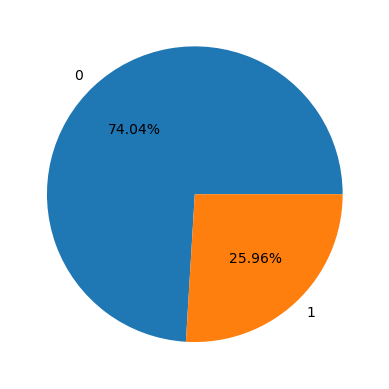

In [180]:
# Kiểm tra mức cân bằng dữ liệu
m= df['Churn'].value_counts()
plt.pie(m.values,labels=m.index,autopct='%.2f%%')
plt.show()

==> Dữ liệu mất cân bằng

In [181]:
df.to_csv('Revise.csv',index=False)

In [182]:
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu (giả sử dữ liệu của bạn là df)
# df = pd.read_csv('your_dataset.csv')  # Thay bằng đường dẫn file của bạn

# Khởi tạo Min-Max Scaler
scaler = MinMaxScaler()

# Áp dụng Min-Max Scaling cho cột 'tenure'
df['tenure'] = scaler.fit_transform(df[['tenure']])

In [183]:
# Phân chia biến độc lập và biến phụ thuộc
X= df.drop(['Churn'],axis=1)
y = df['Churn']

### Cân bằng dữ liệu Undersampling

In [184]:
df_0=df[df['Churn']==0]
df_1=df[df['Churn']==1]
df_0.shape,df_1.shape
# Cân bằnh Undersample
data_0_rus= df_0.sample(df_1.shape[0])

In [185]:
# Nối 2 data vào với nhau
data_rus=pd.concat([data_0_rus,df_1])
data_rus.shape

(3380, 18)

In [186]:
X_rus=data_rus.drop(['Churn'],axis=1)
y_rus=data_rus['Churn']
X_rus.shape,y_rus.shape

((3380, 17), (3380,))

In [187]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Cân bằng Near Miss

In [188]:
### Cân bằng dữ liệu Nearmiss
from imblearn.under_sampling import NearMiss
nm= NearMiss()
X_res, y_res= nm.fit_resample(X,y)
X_res.shape,y_res.shape

((3380, 17), (3380,))

### Cân bằng Over Sampling

In [189]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros= ros.fit_resample(X,y)
X_ros.shape,y_ros.shape

((9640, 17), (9640,))

### Cân bằng Smote

In [190]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)
X_sm.shape,y_sm.shape

((9640, 17), (9640,))

# III. Thử nghiệm các mô hình học máy

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### Mô hình KNN

**1. Dữ liệu UnderSampling**

In [192]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_rus,y_rus,
                                                train_size=0.7,
                                                random_state=42)

In [193]:
# Khai báo mô hình KNN
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()

In [194]:
# fit với dữ liệu train
KNN.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= KNN.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       537
           1       0.66      0.83      0.74       477

    accuracy                           0.72      1014
   macro avg       0.73      0.73      0.72      1014
weighted avg       0.74      0.72      0.72      1014



**2. Dữ liệu NearMiss**

In [195]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_res,y_res,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
KNN.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= KNN.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       537
           1       0.55      0.65      0.60       477

    accuracy                           0.59      1014
   macro avg       0.59      0.59      0.59      1014
weighted avg       0.59      0.59      0.59      1014



**3. Dữ liệu Oversampling**

In [196]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_ros,y_ros,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
KNN.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= KNN.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.73      1434
           1       0.72      0.84      0.77      1458

    accuracy                           0.75      2892
   macro avg       0.76      0.75      0.75      2892
weighted avg       0.76      0.75      0.75      2892



**4. Dữ liệu Smote**

In [197]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_sm,y_sm,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
KNN.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= KNN.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1434
           1       0.73      0.90      0.81      1458

    accuracy                           0.78      2892
   macro avg       0.80      0.78      0.78      2892
weighted avg       0.80      0.78      0.78      2892



Recall (Tỷ lệ phát hiện đúng các khách hàng bỏ rơi):

Lý do chọn Recall: Trong trường hợp này, bạn muốn đảm bảo rằng tất cả các khách hàng có nguy cơ bỏ rơi (churn) được phát hiện, ngay cả khi có thể có một số trường hợp false positive (khách hàng không bỏ rơi nhưng bị dự đoán là bỏ rơi).
Ví dụ: Nếu hệ thống chỉ dự đoán chính xác những khách hàng sẽ bỏ rơi và bỏ sót nhiều khách hàng thật sự có nguy cơ, bạn sẽ mất cơ hội tiếp cận và giữ chân họ. Dù có thể có một số false positive (dự đoán sai rằng khách hàng sẽ bỏ rơi), bạn vẫn có thể gửi các chiến dịch tiếp thị hoặc khuyến mãi cho họ.

Precision (Tỷ lệ chính xác của dự đoán khách hàng bỏ rơi):

Nếu tập trung vào Precision, bạn sẽ giảm thiểu việc dự đoán sai các khách hàng sẽ bỏ rơi. Tuy nhiên, nếu chỉ ưu tiên chính xác, có thể bạn sẽ bỏ sót một số khách hàng thực sự có nguy cơ bỏ rơi, dẫn đến việc không thực hiện được các biện pháp can thiệp.

### Mô hình Decision Tree

In [198]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier
# Khai báo mô hinhf
tree = DecisionTreeClassifier()

In [199]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

**1. Dữ liệu UnerSampling**

In [200]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_rus,y_rus,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
tree.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= tree.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       537
           1       0.62      0.65      0.64       477

    accuracy                           0.65      1014
   macro avg       0.65      0.65      0.65      1014
weighted avg       0.65      0.65      0.65      1014



**2. Dữ liệu Near Miss**

In [201]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_res,y_res,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
tree.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= tree.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       537
           1       0.53      0.59      0.56       477

    accuracy                           0.56      1014
   macro avg       0.56      0.56      0.56      1014
weighted avg       0.57      0.56      0.56      1014



**3. Dữ liệu oversampling**

In [202]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_ros,y_ros,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
tree.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= tree.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1434
           1       0.80      0.91      0.85      1458

    accuracy                           0.84      2892
   macro avg       0.85      0.84      0.84      2892
weighted avg       0.85      0.84      0.84      2892



**4. Dữ liệu Smote**

In [203]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_sm,y_sm,
                                                train_size=0.7,
                                                random_state=42)
# fit với dữ liệu train
tree.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= tree.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1434
           1       0.75      0.77      0.76      1458

    accuracy                           0.75      2892
   macro avg       0.75      0.75      0.75      2892
weighted avg       0.75      0.75      0.75      2892



**==>Sau 7x7 49 lần thử nghiệm thì chúng ta sẽ dùng mô hình Decision Tree với bộ dữ liệu OversamplingOversampling**

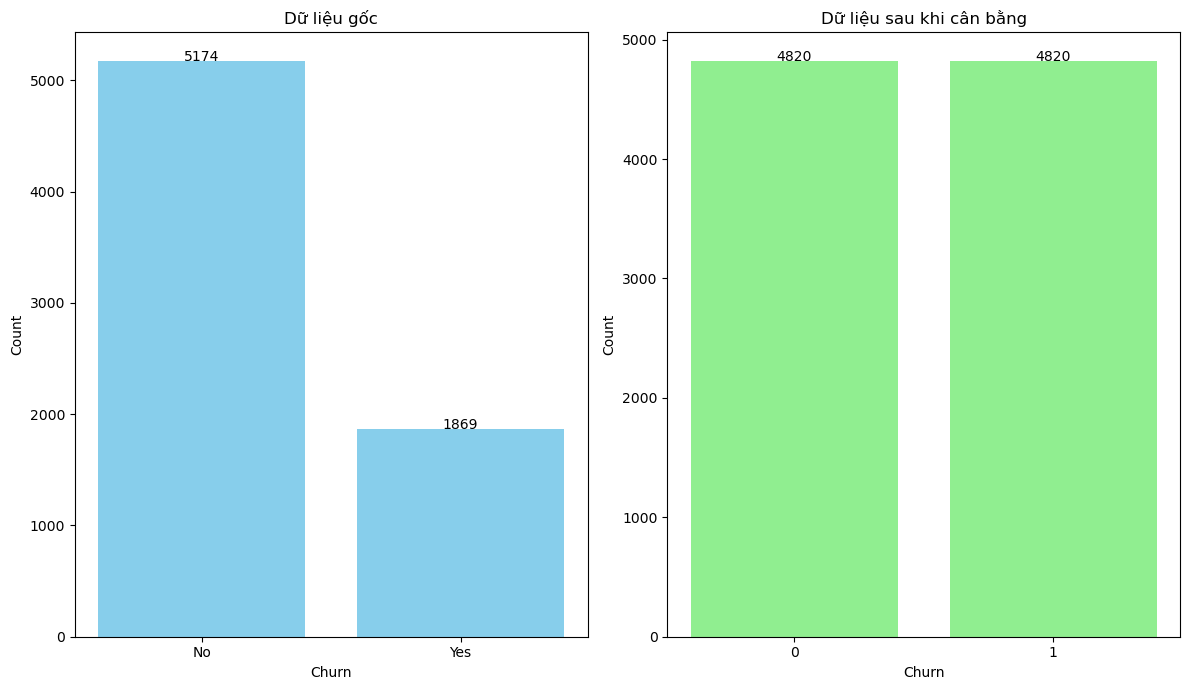

In [204]:
import matplotlib.pyplot as plt

# Tính giá trị đếm cho 't' và 'h'
h = y_ros.value_counts()
t = data['Churn'].value_counts()

# Tạo figure và các subplot
plt.figure(figsize=(12, 7))

# Biểu đồ thứ nhất
plt.subplot(1, 2, 1)
plt.bar(list(map(str, t.index)), t.values, color='skyblue')
for x, y in zip(t.index, t.values):  # Thêm nhãn giá trị vào mỗi cột
    plt.text(x, y + 1, str(y), ha='center', fontsize=10)
plt.title('Dữ liệu gốc')
plt.xlabel('Churn')
plt.ylabel('Count')

# Biểu đồ thứ hai
plt.subplot(1, 2, 2)
plt.bar(list(map(str, h.index)), h.values, color='lightgreen')
for x, y in zip(h.index, h.values):  # Thêm nhãn giá trị vào mỗi cột
    plt.text(x, y + 1, str(y), ha='center', fontsize=10)
plt.title('Dữ liệu sau khi cân bằng')
plt.xlabel('Churn')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1434
           1       0.80      0.91      0.85      1458

    accuracy                           0.84      2892
   macro avg       0.85      0.84      0.84      2892
weighted avg       0.85      0.84      0.84      2892



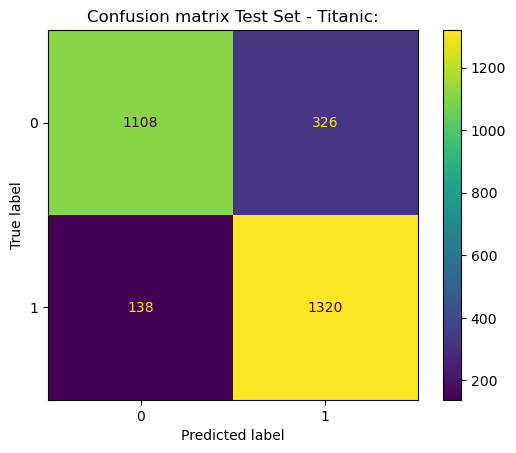

In [219]:
# Phân chia dữ diệu
X_train,X_test,y_train,y_test= train_test_split(X_ros,y_ros,
                                                train_size=0.7,
                                                random_state=42)
# Khởi tạo mô hình Decision Tree với tham số tối ưu
tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2', 
                              min_samples_leaf=1, min_samples_split=2)

# fit với dữ liệu train
tree.fit(X_train,y_train)
# Dự đoán dữ liệu test
y_pred= tree.predict(X_test)
# Đánh giá độ chính xác
print(classification_report(y_test,y_pred))
# Confusion Matrix ( Ma trận nhầm lẫn )
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Titanic:')
plt.show()

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
[0.04564282 0.03386242 0.03340302 0.02704503 0.33451999 0.00591163
 0.04586615 0.03127837 0.11304117 0.02924954 0.03355003 0.03517216
 0.02190123 0.03450362 0.0581404  0.04172485 0.07518758]


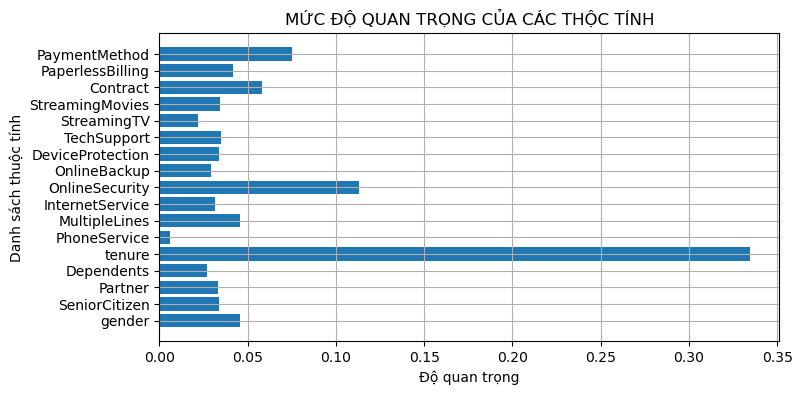

In [220]:
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target_names=['0: Ở lại','1: Rời bỏ']
print(features)
print(tree.feature_importances_)
# trực quan hóa dữ liệu
plt.figure(figsize=(8,4))
plt.barh(features,tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [221]:
import os
import pickle

# Tên folder và file
folder_name = "model"
file_name = "model.pkl"

# Đường dẫn đầy đủ để lưu file
file_path = os.path.join(folder_name, file_name)

# Lưu mô hình vào file
with open(file_path, 'wb') as file:
    pickle.dump(tree, file)

print(f"Mô hình đã được lưu thành công trong folder '{folder_name}' với tên file '{file_name}'.")


Mô hình đã được lưu thành công trong folder 'model' với tên file 'model.pkl'.


# Thử nghiệm mô hình

In [223]:
# Hàm Scale Min_max 
def min_max_scale(value):
    max_val= data['tenure'].max()
    min_val=data['tenure'].min()
    return (value - min_val) / (max_val - min_val)


In [224]:
import pickle

file_path = 'model/model.pkl'

# Đọc file pickle
with open(file_path, 'rb') as file:
    tree = pickle.load(file)

print("Mô hình đã được tải thành công.")


Mô hình đã được tải thành công.


**Customer_1:**
1. customerID                7590-VHVEG
2. gender                        Female
3. SeniorCitizen                      0
4. Partner                          Yes
5. Dependents                        No
6. tenure                             1
7. PhoneService                      No
8. MultipleLines       No phone service
9. InternetService                  DSL
10. OnlineSecurity                    No
11. OnlineBackup                     Yes
12. DeviceProtection                  No
13. TechSupport                       No
14. StreamingTV                       No
15. StreamingMovies                   No
16. Contract              Month-to-month
17. PaperlessBilling                 Yes
18. PaymentMethod       Electronic check
10. MonthlyCharges                 29.85
20. TotalCharges                   29.85

In [225]:
X_ros.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [226]:
customer_1= np.array([[1,0,1,0,min_max_scale(1),0,2,1,0,1,0,0,0,0,1,1,1]])
print('Thông tin của khách hàng:',customer_1)

Thông tin của khách hàng: [[1.         0.         1.         0.         0.01388889 0.
  2.         1.         0.         1.         0.         0.
  0.         0.         1.         1.         1.        ]]


In [227]:
predict = tree.predict(customer_1)
if predict ==1:
    print('Cút được thì cút mẹ mày đi')
else:
    print('Ở lại là đúng đắn đấy')

Cút được thì cút mẹ mày đi
